### Introduction 
### This project is about lung cancer detection using CNN algorithm.
### We can classify and diagnose if the patient have cancer or not using CNN model. We can give them the information about the type of cancer and the way of treatment.

### About Dataset :- Dataset contain 3 lung cancer types which are Adenocarcinoma,Large cell carcinoma, Squamous cell carcinoma , and 1 folder for the normal cell.

### Importing basic libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D

### Explore and load the data.

In [2]:
train_dir=r'C:\Users\pradn\OneDrive\Desktop\Hemant_datascience\CV\Lung cancer detection\train'
test_dir=r'C:\Users\pradn\OneDrive\Desktop\Hemant_datascience\CV\Lung cancer detection\test'
valid_dir=r'C:\Users\pradn\OneDrive\Desktop\Hemant_datascience\CV\Lung cancer detection\valid'

In [3]:
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
valid_data=ImageDataGenerator(rescale=1./255)

train_set = train_data.flow_from_directory(train_dir,target_size=(256,256),batch_size=32,class_mode='categorical')

test_set = test_data.flow_from_directory(test_dir,target_size=(256,256),batch_size=32,class_mode='categorical')

valid_set = test_data.flow_from_directory(valid_dir,target_size=(256,256),batch_size=32,class_mode='categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


### We now check the images from training, testing and validation dataset.

Images for Training......................


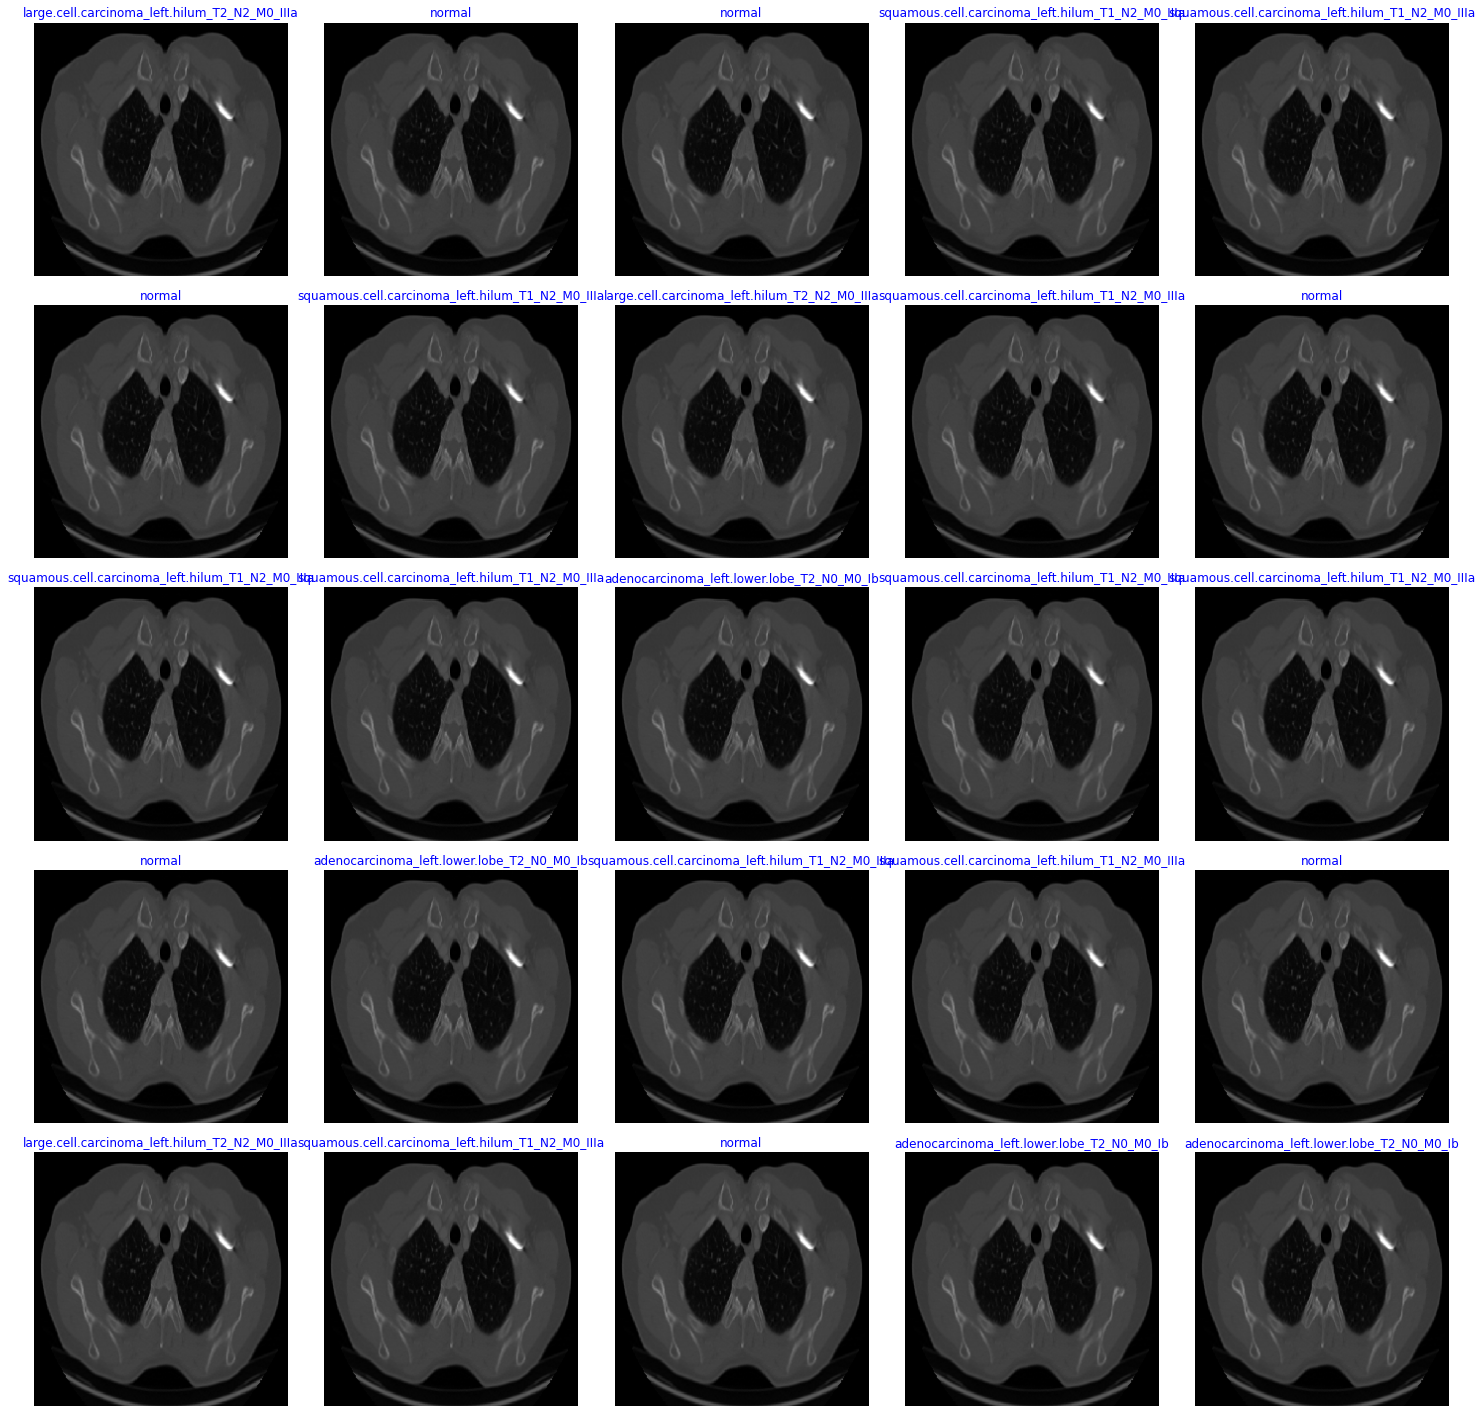

Images for Testing.......................


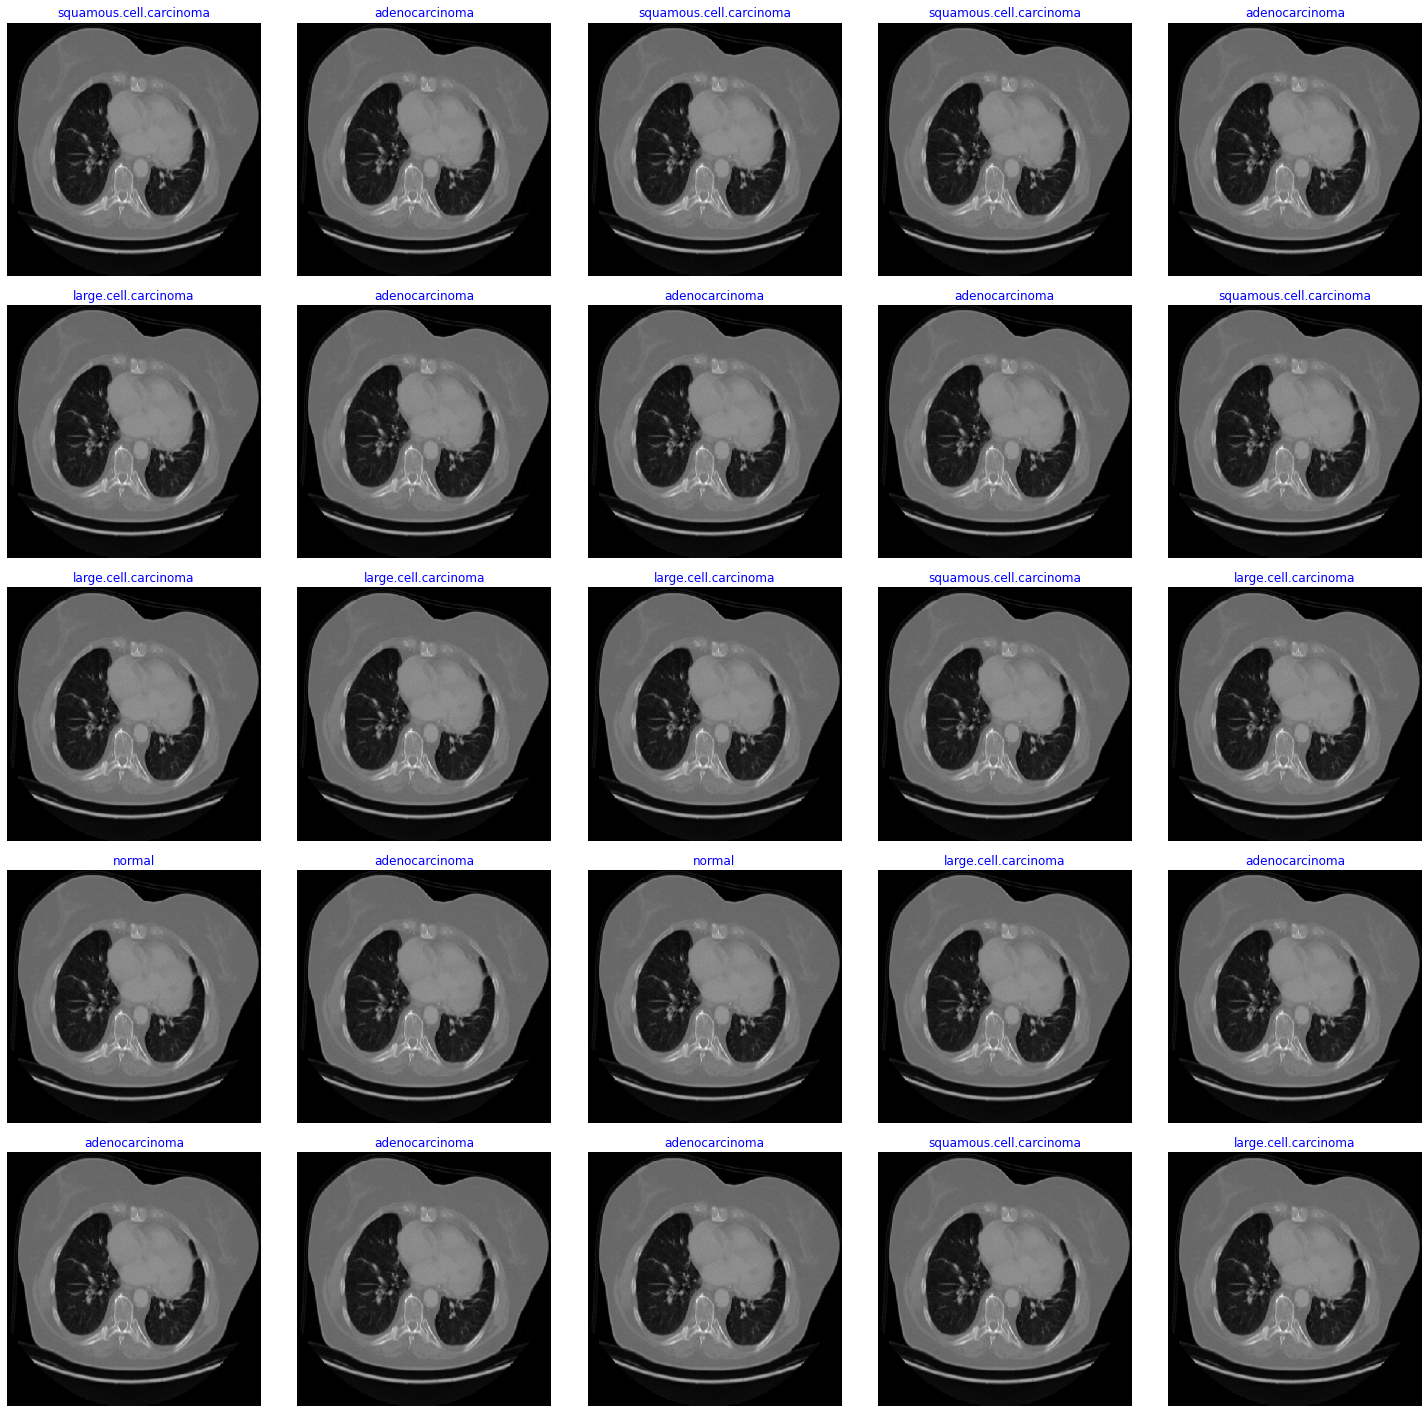

Images for Validation....................


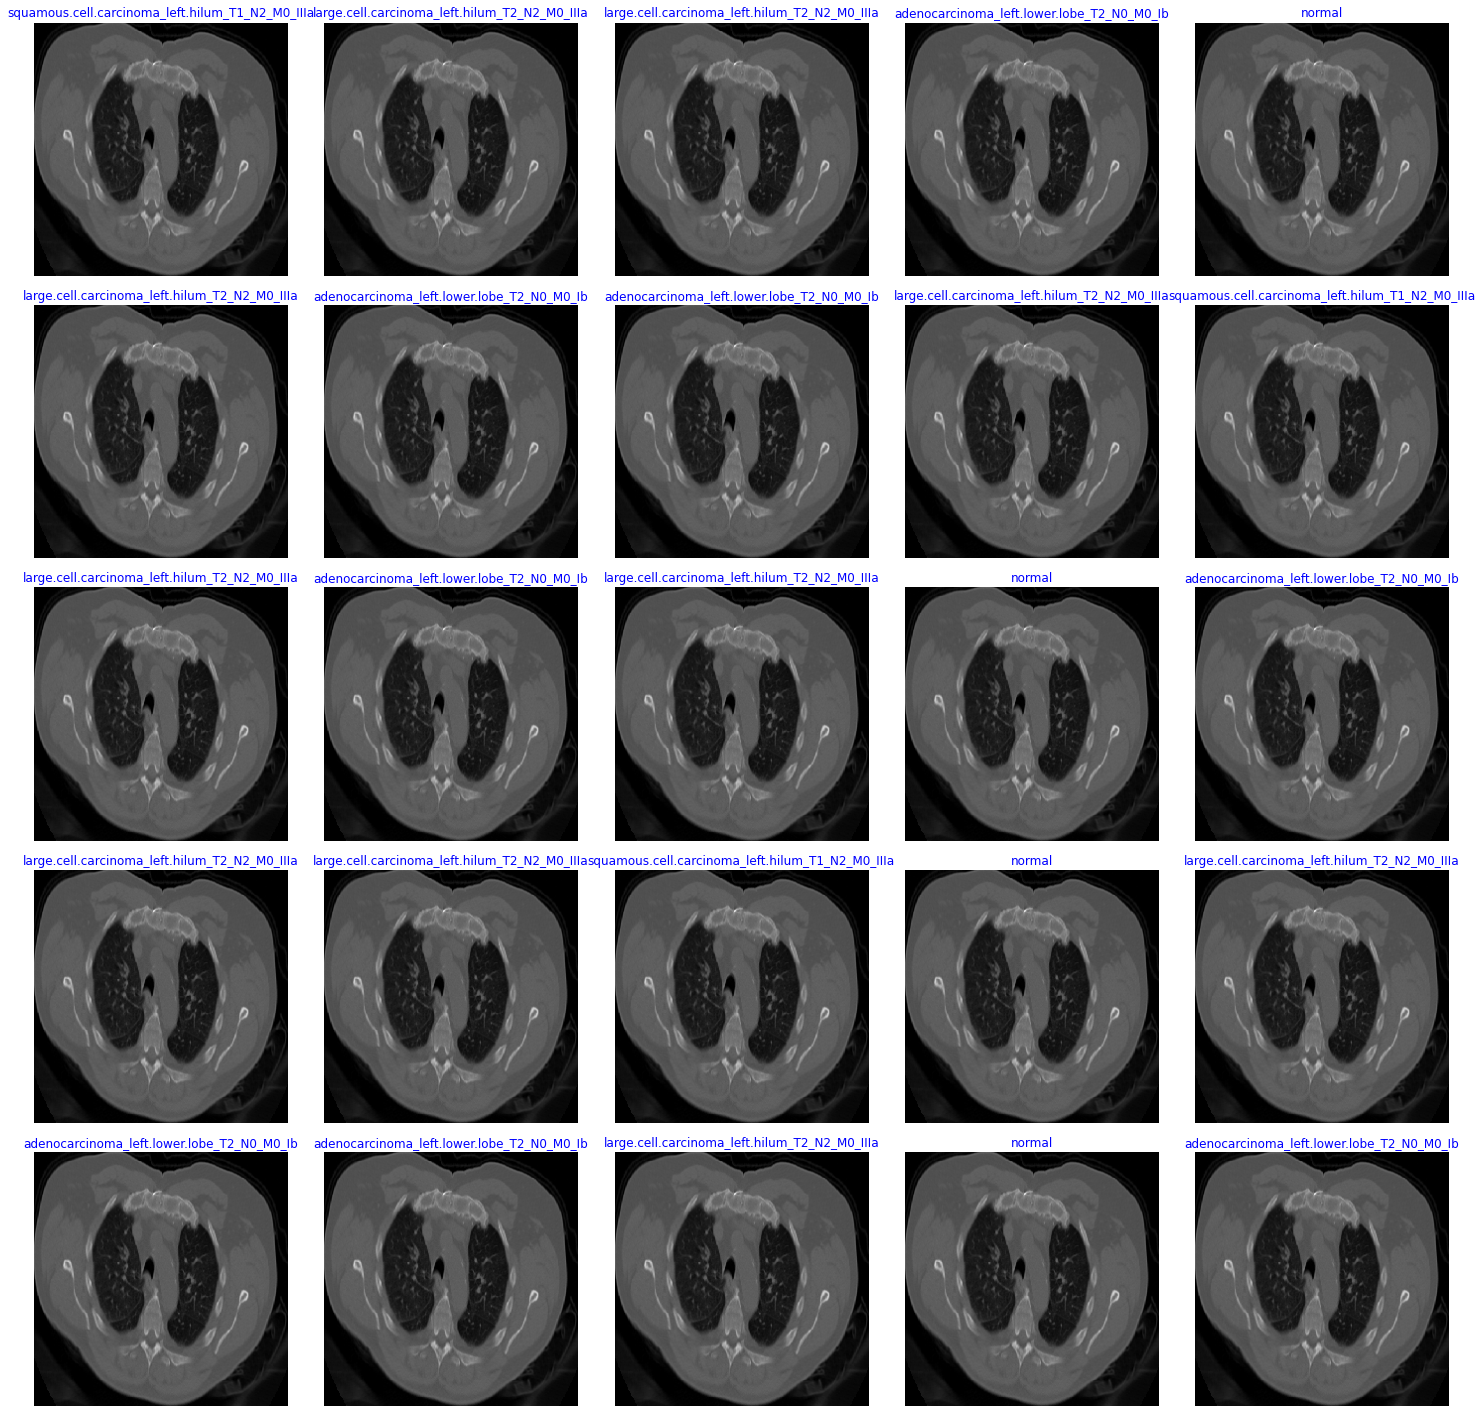

In [4]:
def show_image_samples(gen):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)      
        plt.imshow(images[0], cmap='gray')
        plt.tight_layout() 
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()
    
print("Images for Training......................")
show_image_samples(train_set )
print("Images for Testing.......................")
show_image_samples(test_set )
print("Images for Validation....................")
show_image_samples(valid_set)

### Building CNN architecture.

In [5]:
model=Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout((0.4)))
model.add(Flatten())
model.add(Dense(256, activation='relu', name='Layer_1'))
model.add(Dropout((0.4)))
model.add(Dense(128, activation='relu', name='Layer_2'))
model.add(Dense(4, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [7]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(train_set,epochs=30,batch_size=32,validation_data=valid_set)

Epoch 1/30
20/20 [==============================] - 114s 5s/step - loss: 1.3758 - accuracy: 0.3148 - val_loss: 1.2902 - val_accuracy: 0.4306
Epoch 2/30
20/20 [==============================] - 88s 4s/step - loss: 1.1617 - accuracy: 0.4584 - val_loss: 1.0136 - val_accuracy: 0.5972
Epoch 3/30
20/20 [==============================] - 86s 4s/step - loss: 0.9424 - accuracy: 0.5628 - val_loss: 0.9275 - val_accuracy: 0.4722
Epoch 4/30
20/20 [==============================] - 85s 4s/step - loss: 0.6908 - accuracy: 0.7276 - val_loss: 1.0353 - val_accuracy: 0.6389
Epoch 5/30
20/20 [==============================] - 84s 4s/step - loss: 0.6434 - accuracy: 0.7781 - val_loss: 0.7938 - val_accuracy: 0.5833
Epoch 6/30
20/20 [==============================] - 83s 4s/step - loss: 0.3983 - accuracy: 0.8401 - val_loss: 0.6299 - val_accuracy: 0.7500
Epoch 7/30
20/20 [==============================] - 83s 4s/step - loss: 0.3365 - accuracy: 0.8842 - val_loss: 0.7099 - val_accuracy: 0.6944
Epoch 8/30
20/20 [=

In [9]:
history

### Plotting graph for accuracy and loss.

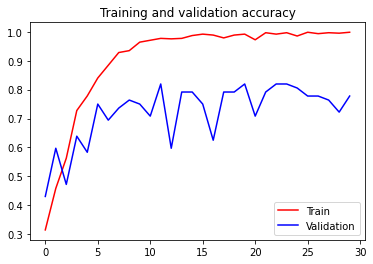

In [10]:
plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

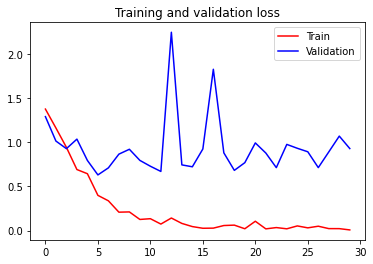

In [11]:
plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(train_set)

20/20 [==============================] - 23s 1s/step - loss: 0.0066 - accuracy: 0.9984


[0.006613182369619608, 0.9983686804771423]

In [13]:
model.evaluate(valid_set)

3/3 [==============================] - 3s 663ms/step - loss: 0.9285 - accuracy: 0.7778


[0.928534209728241, 0.7777777910232544]

### Making prediction.

In [14]:
def chestScanPrediction(path,model):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
    img = cv2.imread(path)
    img = cv2.resize(img, dsize=(256,256))
    test_input=img.reshape((1,256,256,3))
    pred = np.argmax(model.predict(test_input))
    print(classes_dir[pred])
    
path = r"C:\Users\pradn\OneDrive\Desktop\Hemant_datascience\CV\Lung cancer detection\test\large.cell.carcinoma\000110.png"
chestScanPrediction(path,model)

1/1 [==============================] - 1s 1s/step
Large cell carcinoma


In [15]:
path1=r"C:\Users\pradn\OneDrive\Desktop\Hemant_datascience\CV\Lung cancer detection\test\normal\8.png"
chestScanPrediction(path1,model)

1/1 [==============================] - 0s 81ms/step
Normal


In [16]:
path2=r'C:\Users\pradn\OneDrive\Desktop\Hemant_datascience\CV\Lung cancer detection\test\adenocarcinoma\000117.png'
chestScanPrediction(path2,model)

1/1 [==============================] - 0s 72ms/step
Adenocarcinoma


### The model is correctly predicted the images from testing dataset.
### We now pickle the file to make web app using python flask framework.

In [17]:
import pickle

In [18]:
pickle.dump(model,open("cnnmodel.pkl","wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                     

In [19]:
model.save('model.hdf5')